In [1]:
import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf

import pandas as pd
import plotnine as p9

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
#zad1
exercise=pd.read_csv("exercise.csv")
exercise=exercise[0:40]

In [3]:
exercise

,y,x1,x2
0,15.68,6.87,14.09
1,6.18,4.40,4.35
2,18.10,0.43,18.09
3,9.07,2.73,8.65
4,17.97,3.25,17.68
5,10.04,5.30,8.53
6,20.74,7.08,19.50
7,9.76,9.73,0.72
8,8.23,4.51,6.88
9,6.52,6.40,1.26


In [4]:
results = smf.ols('y ~ x1 + x2', data=exercise).fit()
wyn=results.params

In [5]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     652.4
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           1.41e-29
Time:                        17:35:49   Log-Likelihood:                -50.985
No. Observations:                  40   AIC:                             108.0
Df Residuals:                      37   BIC:                             113.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3151      0.388      3.392      0.002       0.530       2.101
x1             0.5148      0.046     11.216      0.000       0.422       0.608
x2             0.8069      0.024     33.148      0.000       0.758       0.856
==============================================================================
Omnibus:                       14.478   Durbin-Watson:                   2.509
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.393
Skew:                           1.341   Prob(JB):                     0.000454
Kurtosis:                       4.428   Cond. No.                         38.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
fig1=(p9.ggplot(p9.aes(x='x1',y='y'),data=exercise)
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn['x1'])))

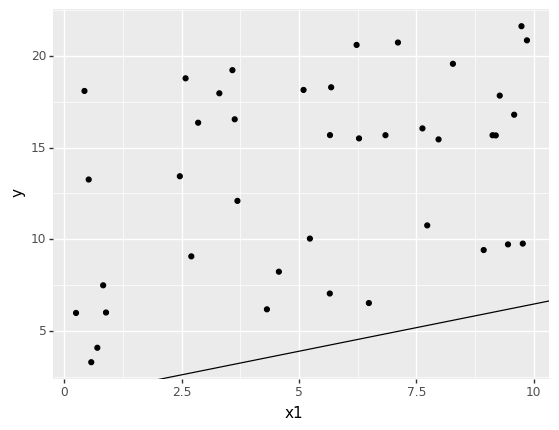

<ggplot: (-9223363302878951971)>

In [7]:
fig1

In [8]:
fig2=(p9.ggplot(p9.aes(x='x2',y='y'),data=exercise)
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn['x2'])))

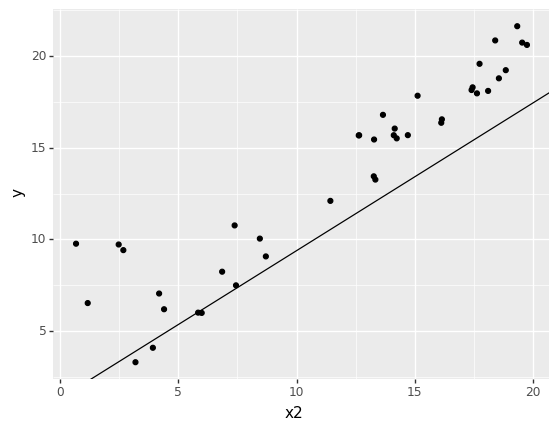

<ggplot: (-9223363302879004612)>

In [9]:
fig2

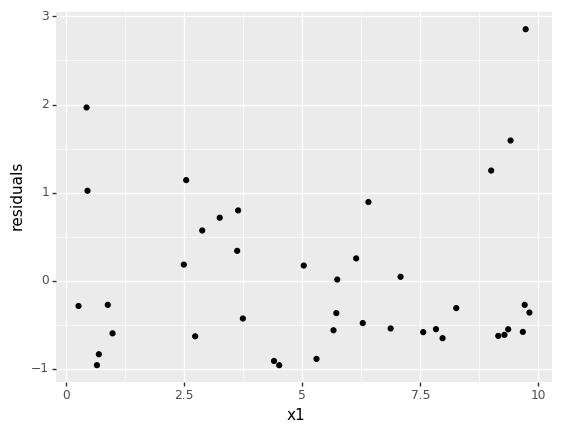

<ggplot: (8733975740841)>

In [10]:
df=exercise
df['y_pred']=results.predict()
df['residuals']=df['y']-df['y_pred']
fig1_res=(p9.ggplot(p9.aes(x='x1',y='residuals'),data=exercise)
      +p9.geom_point())
fig1_res

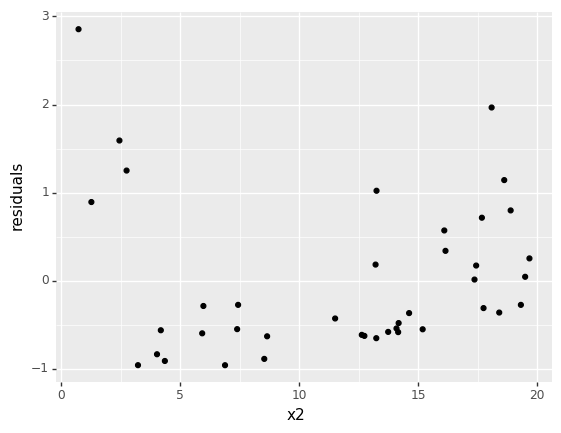

<ggplot: (-9223363302879035104)>

In [11]:
fig2_res=(p9.ggplot(p9.aes(x='x2',y='residuals'),data=exercise)
      +p9.geom_point())
fig2_res

In [12]:
exercise_v2=pd.read_csv("exercise.csv")
results_v2 = smf.ols('y ~ x1 + x2', data=exercise_v2).fit()
X = exercise_v2[40:60].drop('y',axis = 1)
Y_pred = results_v2.predict(X)
Y_pred

40    14.812484
41    19.142865
42     5.916816
43    10.530475
44    19.012485
45    13.398863
46     4.829144
47     9.145767
48     5.892489
49    12.338639
50    18.908561
51    16.064649
52     8.963122
53    14.972786
54     5.859744
55     7.374900
56     4.535267
57    15.133280
58     9.100899
59    16.084900
dtype: float64

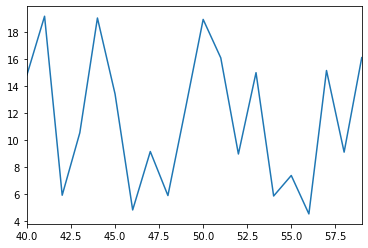

In [17]:
Y_pred.plot()

In [18]:
#zad2

In [19]:
beauty=pd.read_csv("beauty.csv")    
beauty

,tenured,profnumber,minority,age,beautyf2upper,beautyflowerdiv,beautyfupperdiv,beautym2upper,beautymlowerdiv,beautymupperdiv,...,nonenglish,onecredit,percentevaluating,profevaluation,students,tenuretrack,blkandwhite,btystdvariance,btystdavepos,btystdaveneg
0,0,1,1,36,6,5,7,6,2,4,...,0,0,55.81395,4.7,43,1,0,2.129806,0.201567,0.000000
1,1,2,0,59,2,4,4,3,2,3,...,0,0,85.00000,4.6,20,1,0,1.386081,0.000000,-0.826081
2,1,3,0,51,5,5,2,3,2,3,...,0,0,100.00000,4.1,55,1,0,2.537435,0.000000,-0.660333
3,1,4,0,40,4,2,5,2,3,3,...,0,0,86.95652,4.5,46,1,0,1.760577,0.000000,-0.766312
4,0,5,0,31,9,7,9,6,7,6,...,0,0,87.50000,4.8,48,1,0,1.693100,1.421450,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,0,93,0,32,9,6,6,5,7,8,...,0,0,42.85714,4.1,21,1,0,3.107088,1.143040,0.000000
459,0,93,0,32,9,6,6,5,7,8,...,0,0,60.46511,4.5,86,1,0,3.107088,1.143040,0.000000
460,0,94,1,42,7,3,8,4,4,6,...,1,0,77.61194,4.4,67,1,0,3.018447,0.332051,0.000000
461,0,94,1,42,7,3,8,4,4,6,...,1,0,81.81818,4.4,66,1,0,3.018447,0.332051,0.000000


In [20]:
dane=pd.read_csv("beauty.csv")
print(len(dane))

piekno = "btystdave"
ocena = "courseevaluation"

463


In [21]:
results = smf.ols(ocena +"~btystdave", data=dane).fit()
wyn=results.params

fig1=(p9.ggplot(p9.aes(x="btystdave",y=ocena),data=dane)
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn["btystdave"])))

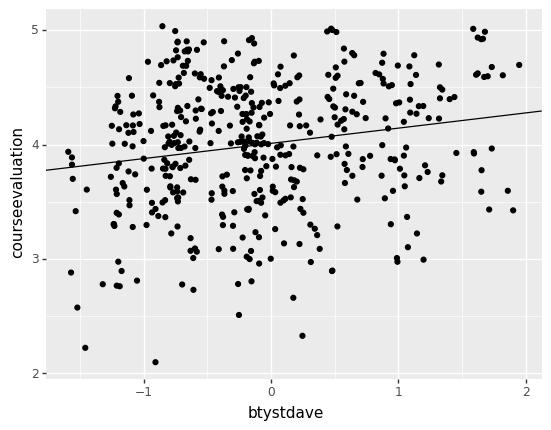

<ggplot: (-9223363302878906894)>

In [22]:
fig1

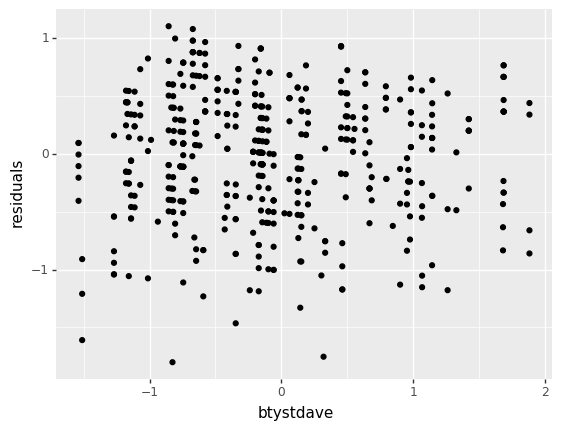

<ggplot: (8733975463688)>

In [23]:
df2=beauty
df2['y_pred']=results.predict()
df2['residuals']=df2['courseevaluation']-df2['y_pred']
fig2_res=(p9.ggplot(p9.aes(x='btystdave',y='residuals'),data=beauty)
      +p9.geom_point())
fig2_res

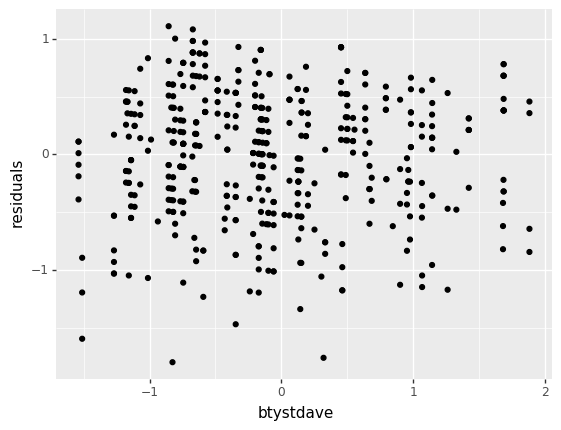

<ggplot: (-9223363302879318356)>

In [25]:
results = smf.ols(ocena +"~btystdavepos + btystdave", data=dane).fit()
wyn=results.params

fig1=(p9.ggplot(p9.aes(x="btystdave",y=ocena),data=dane)
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn["btystdave"])))
fig1

df2=beauty
df2['y_pred']=results.predict()
df2['residuals']=df2['courseevaluation']-df2['y_pred']
fig2_res=(p9.ggplot(p9.aes(x='btystdave',y='residuals'),data=beauty)
      +p9.geom_point())
fig2_res

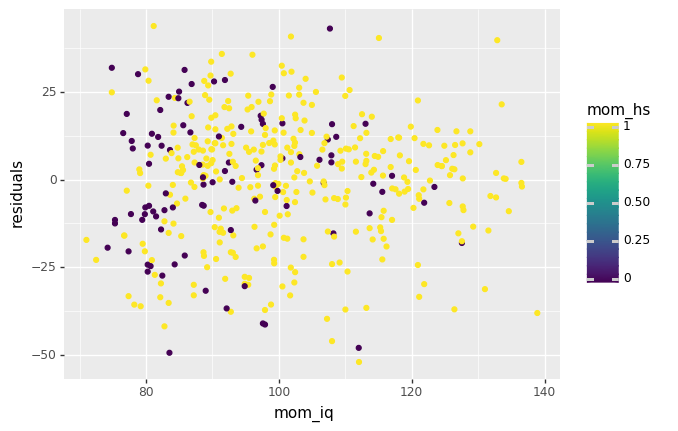

<ggplot: (7556422720)>